In [1]:
# Fix the random seed.
import random
import numpy as np
import torch

%load_ext autoreload
%autoreload 2

import os
import sys


project_path = os.environ.get('PROJECT_PATH', '../')

sys.path.append(os.path.join(project_path, 'src'))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
from train.helpers import load_model
from train.vae import VAE, get_model
import torch.optim as optim
from torch.nn.parallel import DistributedDataParallel as DDP
import torch.nn as nn


checkpoint_path = os.path.join(project_path, 'model', 'vae', 'final-vae-1.pt')


model = VAE().to(device)
model = nn.DataParallel(model)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
load_model(model, optimizer, checkpoint_path)
model_module = get_model(model)


loaded the model from /project/cs231/CS231N-Final-Proj/model/vae/final-vae-1.pt


In [4]:
import torchvision.utils as vutils

s = model_module.sample(device, 1)
s = s.view(-1, 1, 128, 128)

vutils.save_image(
    s.data,
    f"../output/vae/sample.png",
    normalize=True,
)

In [9]:
import matplotlib.pyplot as plt

def scale_to_01(tensor):
    """
    Function to scale score a tesnor of batch size x dim
    """
    scaled_tensor = (tensor - tensor.min().item()) / (tensor.max().item() - tensor.min().item())
    return scaled_tensor

def show_image(image, name_img: str):
    """
    Instance method that would plot an
    image to see if the dataset is properly set.
    """
    f, ax1 = plt.subplots(1, 1)
    image = (image - image.min()) / (image.max() - image.min()) 
    # ax1.set_title('Desired image ' + name_img)
    ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')
    plt.show()

In [7]:
def print_num_params(model):
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f'Total parameters: {total_params}, Trainable parameters: {trainable_params}')

In [8]:
# load model from checkpoint using torch
import torch
from train.gan import Discriminator, Generator

discriminator = Discriminator()
generator = Generator()

In [6]:
print_num_params(discriminator), print_num_params(generator)

Total parameters: 2761729, Trainable parameters: 2761729
Total parameters: 3572736, Trainable parameters: 3572736


(None, None)

In [10]:
from train.helpers import get_data_loaders, get_dataframes


dfs_holder, dfs_names = get_dataframes(
        os.path.join(project_path, "meta"), diseases=["No Finding"], data='small'
)

data_path = os.environ.get("DATA_PATH")

train_loader, test_loader, val_loader = get_data_loaders(
    dfs_holder,
    dfs_names,
    data_path,
    batch_size=64,
    num_workers=0,
    data_augmentation=False,
    image_size=128
)


 25%|██▌       | 1/4 [00:00<00:00,  6.18it/s]

100%|██████████| 4/4 [00:00<00:00, 17.95it/s]

The file: train.csv has been retrieved
The file: test.csv has been retrieved
The file: val.csv has been retrieved


In [11]:
sample = next(iter(train_loader))[0]

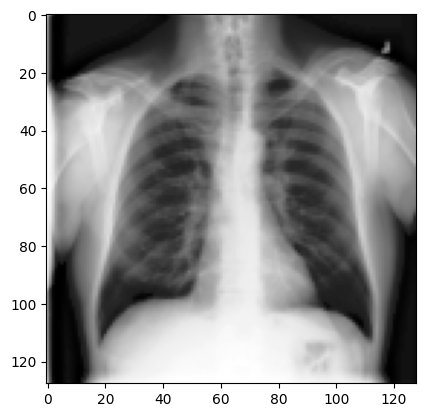

In [12]:
show_image(sample[0], 'sample')

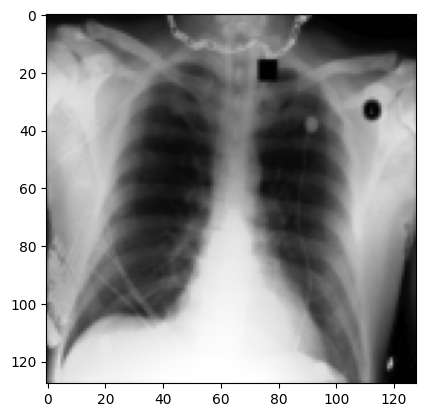

In [13]:
show_image(sample[1], 'sample')

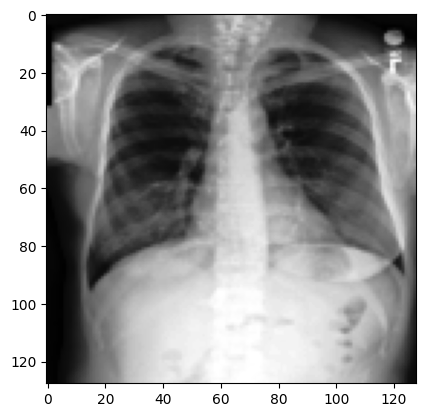

In [14]:
show_image(sample[2], 'sample')

In [2]:
for a in range(1):
    print (a)

0


In [4]:
from train.gan import sample_noise
import torch.nn as nn
from train.gan import Discriminator, Generator

path = os.path.join(project_path, 'model', 'gan', 'bn_generator-1.pt')

dim_z = 1024

generator = nn.DataParallel(Generator(dim_z))

generator = generator.to(device)

generator.load_state_dict(torch.load(path))

x = sample_noise(5, dim_z).view(5, dim_z, 1, 1).to(device)
output = generator(x)

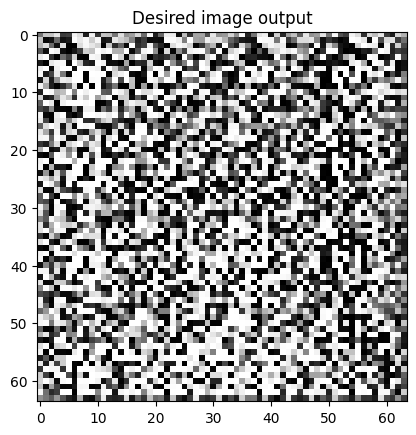

In [12]:
show_image(output[0].detach().cpu(), 'output')

In [ ]:
import torchvision.utils as vutils

vutils.save_image(output, 'output.png', normalize=True)

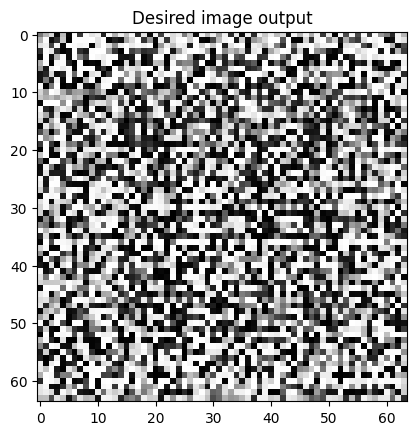

In [5]:
show_image(output[0].detach().cpu(), 'output')

In [7]:
print_num_params(discriminator)

Total parameters: 2761729, Trainable parameters: 2761729


In [4]:
# load model from checkpoint using torch
import torch
from train.vae import VAE

vae = VAE()

In [23]:
vae

VAE(
  (encoder_module): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dila

In [29]:
import torch.nn as nn

print_num_params(vae.decoder_module)

Total parameters: 25286233, Trainable parameters: 25286233


In [5]:
from train.vae import VAE

vae = VAE()
vae.load_from_checkpoint('/project/cs231/CS231N-Final-Proj/models/vae/2024-05-30_08-04-55-toy-vae-20-epochs')

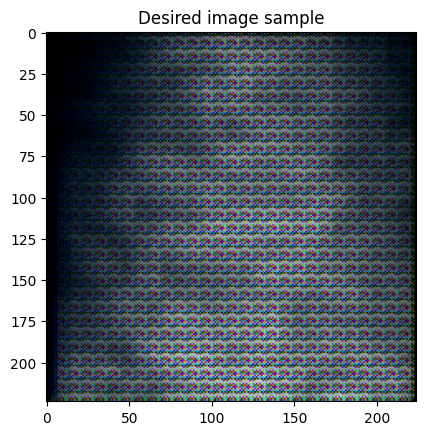

In [6]:
sample = vae.sample()
show_image(sample[0], 'sample')

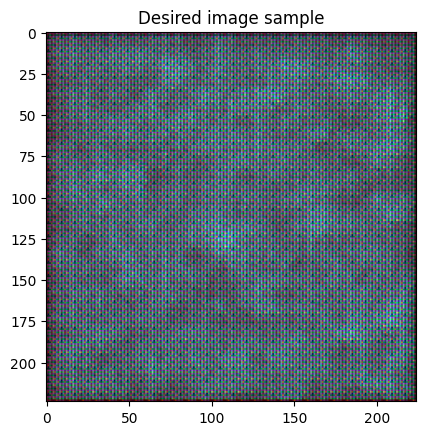

In [8]:
sample = vae.sample()
show_image(sample[0], 'sample')

In [9]:
torch.min(sample)

tensor(0.)

In [10]:
# load model from checkpoint using torch
import torch
from train.vae import VAE

vae = VAE()

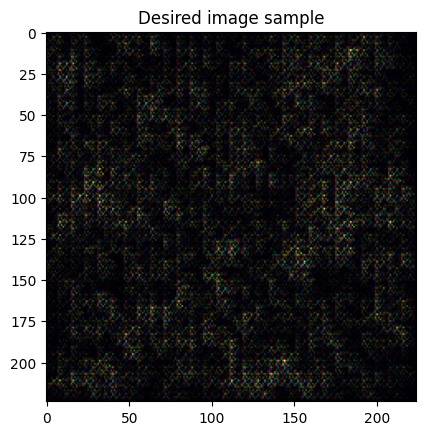

In [11]:
sample = vae.sample()
show_image(sample[0], 'sample')

In [41]:
total_params = sum(p.numel() for p in vae.parameters())
trainable_params = sum(p.numel() for p in vae.parameters() if p.requires_grad)
total_params, trainable_params

(152405085, 137690397)